<a href="https://colab.research.google.com/github/priyarameshd/SVM/blob/main/SVM_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns

In [2]:
filename = '/content/mushroom.csv'

df_mushroom = pd.read_csv(filename)


### EDA

In [3]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df_mushroom.head(2)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319


In [5]:
df_mushroom.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
df_mushroom.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

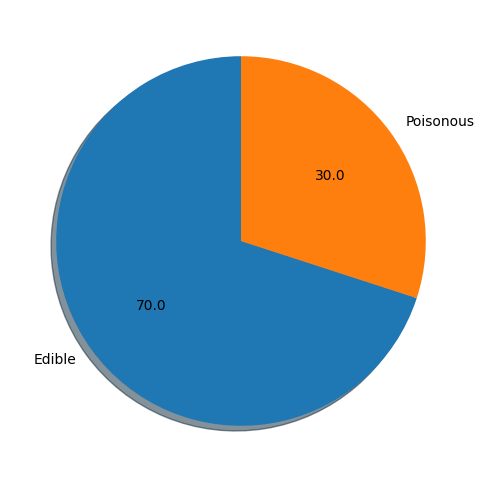

In [7]:
plt.figure(figsize = (6,6))
plt.pie(df_mushroom['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

Only 30% chances of picking a poisonous mushroom from the samples.

In [9]:
col_names_categ = df_mushroom.columns
label_encoder = preprocessing.LabelEncoder()
for colname in col_names_categ:
    df_mushroom[colname] = label_encoder.fit_transform(df_mushroom[colname])

In [10]:
df_mushroom.head(2)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750


In [11]:
X = df_mushroom.drop(columns='class',axis=1)
Y = df_mushroom['class']

In [12]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [13]:
X

array([[ 1.4358029 ,  1.35664266,  0.39842442, ...,  0.97916574,
         1.55384785, -1.00667629],
       [ 1.07325574,  1.35664266, -1.39628018, ...,  0.97916574,
        -1.2467361 ,  0.96340142],
       [-0.82747693,  0.66003539, -0.49892788, ...,  0.97916574,
         0.20686648, -0.68653866],
       ...,
       [-0.97179182, -0.03657188, -0.49892788, ...,  1.4865055 ,
         1.35126754, -0.1342133 ],
       [-0.53532728, -1.42978643,  1.29577672, ...,  1.4865055 ,
         0.71154024, -0.54933682],
       [ 1.17181225, -0.03657188,  0.39842442, ...,  0.47182598,
         1.23043016,  1.25187709]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=42,shuffle=True,)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 25), (1600,), (400, 25), (400,))

### SVM classiffier and Hyperparameter Tuning

In [16]:
clf = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [17]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.865)

In [18]:
def best_kernel(kernel_name):

  clf = SVC(kernel= kernel_name)
  clf.fit(X_train , y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred) * 100
  print("Accuracy =", acc)
  conf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat, annot=True, fmt='g')
  plt.title('Confusion Matrix of the Test Data (Edible Class Based) for kernel {}'.format(kernel_name), fontsize=14)
  plt.ylabel('Real Class', fontsize=12)
  plt.xlabel('Predicted Class', fontsize=12)
  return

For kernel linear

Accuracy = 66.75


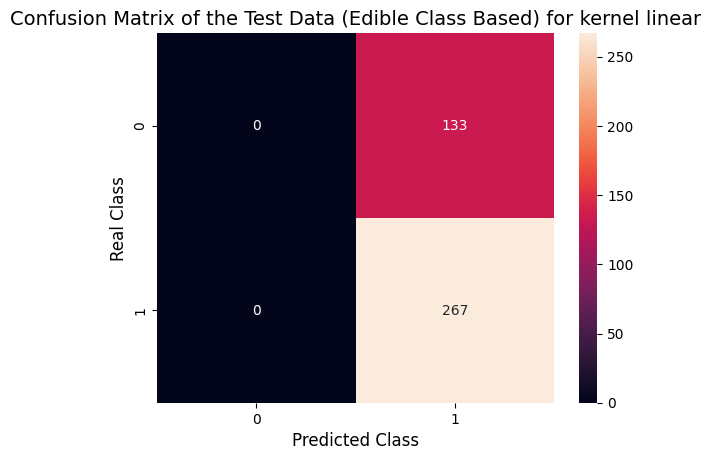

In [19]:
best_kernel("linear")

Plynomial kernal

Accuracy = 82.75


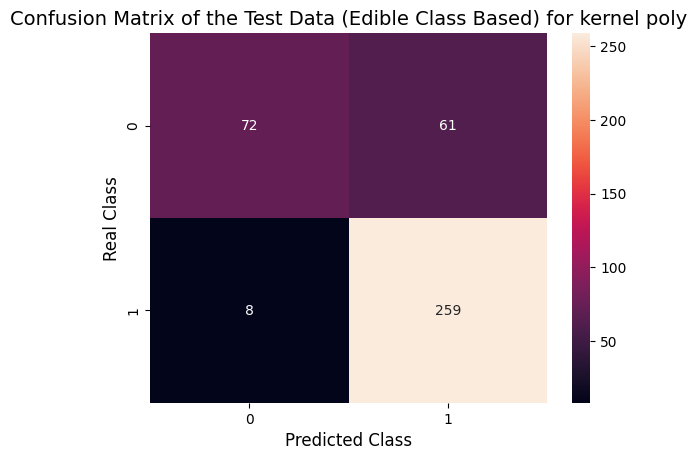

In [20]:
best_kernel("poly")

Sigmoid kernel

Accuracy = 64.75


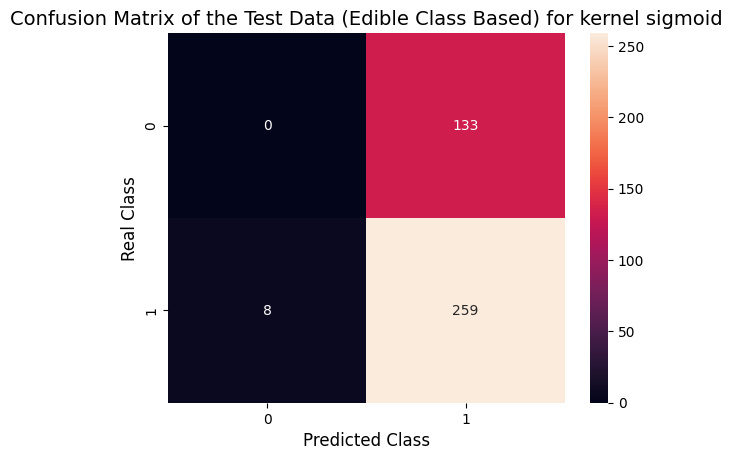

In [21]:
best_kernel("sigmoid")

rbf kernel is better comparing to others.


Model with best parameters

Accuracy = 88.5


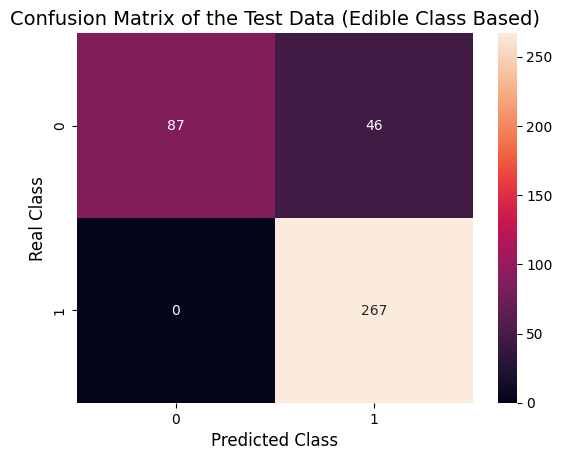

In [22]:
clf = SVC(C= 15, gamma = 50)
model = clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Edible Class Based)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [23]:
TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

In [25]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy)

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity)

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)



Accuracy Score: 0.885
Precision Score: 1.0
True positive Rate: 0.853035143769968
False positive Rate 0.3458646616541353
F1 Score: 0.9206896551724137
Specificity: 0.6541353383458647
Mean Absolute Error: 0.115


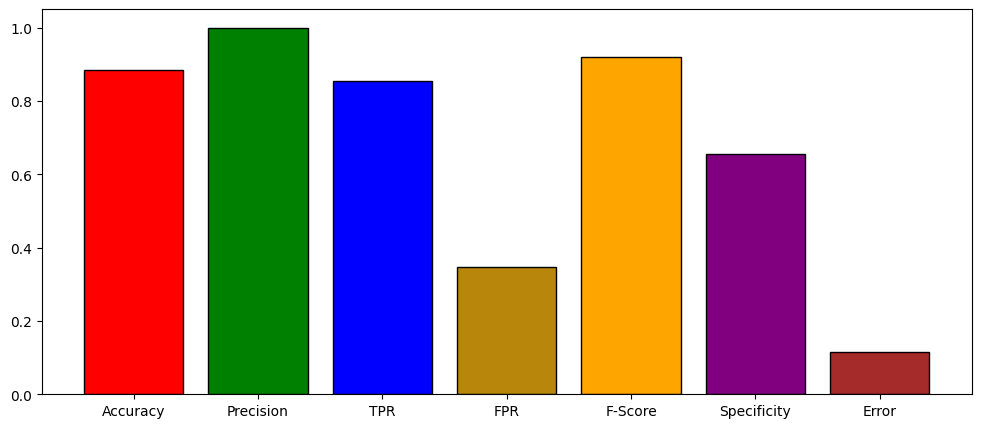

In [26]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

Strengths: SVMs are effective in high-dimensional spaces, making them suitable for datasets with many features like the Mushroom dataset. They can capture complex nonlinear relationships through kernel trick. SVMs are also less prone to overfitting, especially with appropriate regularization.

Weaknesses: SVMs may not perform well on very large datasets due to their computational complexity. Choosing the right kernel and tuning hyperparameters can be challenging. SVMs may also struggle with datasets that have overlapping classes or noisy data.

Support Vector Machines (SVMs) hold significant practical implications in real-world classification tasks across diverse domains. Their versatility enables their application in various contexts, including image classification, text categorization, bioinformatics, financial forecasting, and medical diagnosis. Particularly valuable is their effectiveness in high-dimensional feature spaces, making them suitable for datasets with numerous features, such as those encountered in natural language processing and computer vision. Additionally, SVMs exhibit robustness to overfitting, especially with appropriate regularization techniques, which enhances their ability to generalize well to unseen data. Their capability to capture complex nonlinear relationships through kernel functions allows them to model intricate decision boundaries, rendering them effective in handling datasets with nonlinear separability. Moreover, SVMs support both binary and multiclass classification tasks, making them versatile for a wide range of classification problems. While SVMs with nonlinear kernels produce complex decision boundaries, linear SVMs offer interpretable models with easily interpretable coefficients, which can be advantageous in domains where interpretability is crucial. While SVMs can be computationally demanding, advancements in optimization algorithms and parallel computing have improved their scalability, enabling their application to larger datasets. Efficient hyperparameter tuning and data preprocessing techniques further enhance the performance and efficiency of SVM models, making them a valuable tool in real-world classification scenarios.

### PCA

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
df_mushroom_sc = df_mushroom.drop(columns="class")


In [ ]:
X = scale(df_mushroom_sc)
y = df_mushroom["class"]

In [ ]:
X.shape

(2000, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pca = PCA(n_components= 22)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
var_ratio = pca.explained_variance_ratio_

var_ratio

array([0.05710619, 0.05266533, 0.05133135, 0.05058547, 0.04818939,
       0.04597162, 0.04492715, 0.04412347, 0.04295806, 0.04190538,
       0.04082514, 0.04044035, 0.03899736, 0.03812443, 0.03739198,
       0.03624856, 0.03518607, 0.035018  , 0.03416963, 0.03245969,
       0.03178833, 0.03152756])

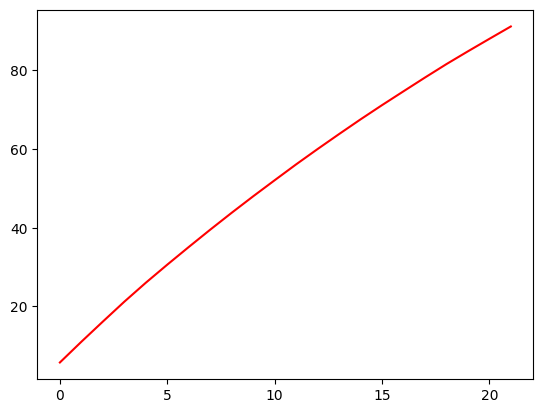

In [ ]:
plt.plot(np.cumsum(np.round(var_ratio,decimals = 4)*100),color="red")

Text(0, 0.5, 'Second Principal Component')

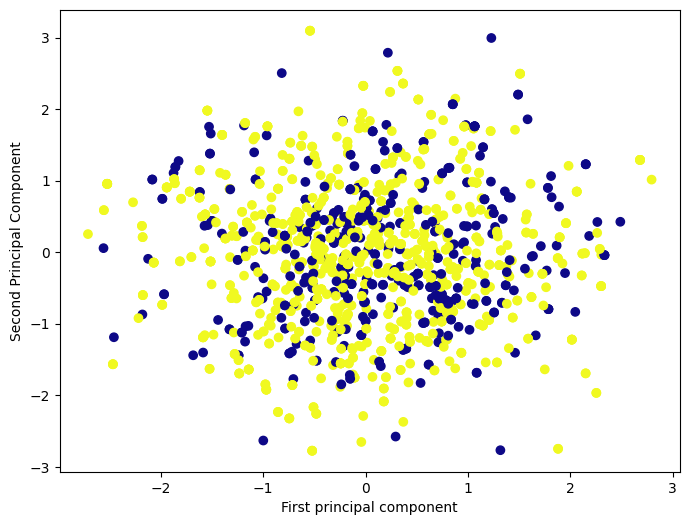

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
param_grid = {'kernel':["rbf"],'gamma':[50,55,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
conf_mat = confusion_matrix(y_test, y_pred)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best params: {'C': 15, 'gamma': 50, 'kernel': 'rbf'}
Accuracy = 88.16666666666667


In [ ]:

conf_mat

array([[114,  71],
       [  0, 415]])

With PCA accuracy is same.